## IMPORTAR DADOS

In [1]:
# IMPORTAÇÃO DAS BIBLIOTECAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
## IMPORTAÇÃO DO DATASET

# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "blastchar/telco-customer-churn",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-3938296146.py:12: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'telco-customer-churn' dataset.
First 5 records:    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic            

In [3]:
data = df

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#preparo dos dados  tratar TotalCharges

# Converter TotalCharges para numérico
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

# Tratar possíveis valores NaN criados
data["TotalCharges"] = data["TotalCharges"].fillna(0)


In [7]:
# separaçaõ das colunas categoricas e númericas
num_cols = data.select_dtypes(include=["int64", "float64"]).columns
cat_cols = data.select_dtypes(include=["object"]).columns

print("Numéricas:", list(num_cols))
print("Categóricas:", list(cat_cols))


Numéricas: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categóricas: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


## INSPEÇÃO INICIAL NO DF


In [ ]:
print("Formato do df (linhas, colunas):", df.shape)

print("\nTipos de dados:")
print(df.dtypes)

print("\nPrimeiras linhas:")
try:
    display(df.head())
except NameError:
    print(df.head())

print("\nResumo de valores ausentes por coluna:")
print(df.isna().sum())

print("\nValores únicos da coluna-alvo Churn:")
print(df["Churn"].value_counts())
print("\nProporção da coluna-alvo Churn:")
print(df["Churn"].value_counts(normalize=True))

Formato do df (linhas, colunas): (7043, 21)

Tipos de dados:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Primeiras linhas:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Resumo de valores ausentes por coluna:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Valores únicos da coluna-alvo Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Proporção da coluna-alvo Churn:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [ ]:
cols_basicas = [
    "customerID", "gender", "SeniorCitizen", "Partner", "Dependents",
    "tenure", "PhoneService", "InternetService",
    "MonthlyCharges", "TotalCharges", "Churn"
]

for col in cols_basicas:
    if col in df.columns:
        print(f"\n=== {col} ===")
        print(df[col].value_counts(dropna=False).head())



=== customerID ===
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
Name: count, dtype: int64

=== gender ===
gender
Male      3555
Female    3488
Name: count, dtype: int64

=== SeniorCitizen ===
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

=== Partner ===
Partner
No     3641
Yes    3402
Name: count, dtype: int64

=== Dependents ===
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

=== tenure ===
tenure
1     613
72    362
2     238
3     200
4     176
Name: count, dtype: int64

=== PhoneService ===
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

=== InternetService ===
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

=== MonthlyCharges ===
MonthlyCharges
20.05    61
19.85    45
19.95    44
19.90    44
20.00    43
Name: count, dtype: int64

=== TotalCharges ===
TotalCharges
0.00     11
20.20    11
19.75     9
20.05     8
19.90     8
Name: count, d

## ANALISE EXPLORATÓRIA

In [ ]:

num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)


Numéricas: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categóricas: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [ ]:
print("Qtd de IDs únicos:", df["customerID"].nunique())
print("Qtd de linhas:", len(df))

print("\nRegistros duplicados de customerID:", df["customerID"].duplicated().sum())


Qtd de IDs únicos: 7043
Qtd de linhas: 7043

Registros duplicados de customerID: 0


In [ ]:
df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [ ]:
print(df["Churn"].value_counts())
print("\nProporção:")
print(df["Churn"].value_counts(normalize=True))


Churn
No     5174
Yes    1869
Name: count, dtype: int64

Proporção:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [ ]:
def churn_por(col):
    tab = pd.crosstab(df[col], df["Churn"], normalize="index")
    tab = tab.rename(columns={"No": "Churn_No", "Yes": "Churn_Yes"})
    return (tab.sort_values("Churn_Yes", ascending=False)
               .style.format("{:.2%}"))

cols_teste = ["gender", "SeniorCitizen", "Partner", "Dependents",
              "InternetService", "Contract", "PaymentMethod"]

for c in cols_teste:
    if c in df.columns:
        print(f"\n==== {c} ====")
        display(churn_por(c))



==== gender ====


Churn,Churn_No,Churn_Yes
gender,,
Female,73.08%,26.92%
Male,73.84%,26.16%



==== SeniorCitizen ====


Churn,Churn_No,Churn_Yes
SeniorCitizen,,
1,58.32%,41.68%
0,76.39%,23.61%



==== Partner ====


Churn,Churn_No,Churn_Yes
Partner,,
No,67.04%,32.96%
Yes,80.34%,19.66%



==== Dependents ====


Churn,Churn_No,Churn_Yes
Dependents,,
No,68.72%,31.28%
Yes,84.55%,15.45%



==== InternetService ====


Churn,Churn_No,Churn_Yes
InternetService,,
Fiber optic,58.11%,41.89%
DSL,81.04%,18.96%
No,92.60%,7.40%



==== Contract ====


Churn,Churn_No,Churn_Yes
Contract,,
Month-to-month,57.29%,42.71%
One year,88.73%,11.27%
Two year,97.17%,2.83%



==== PaymentMethod ====


Churn,Churn_No,Churn_Yes
PaymentMethod,,
Electronic check,54.71%,45.29%
Mailed check,80.89%,19.11%
Bank transfer (automatic),83.29%,16.71%
Credit card (automatic),84.76%,15.24%


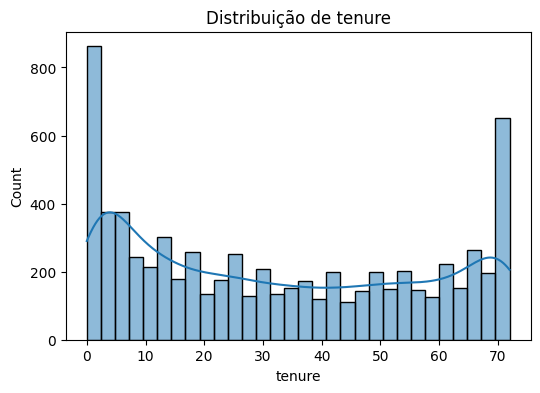

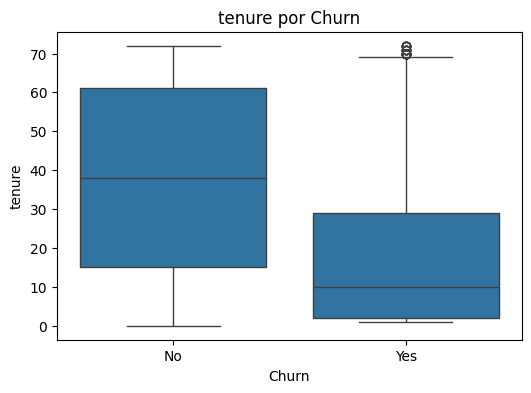

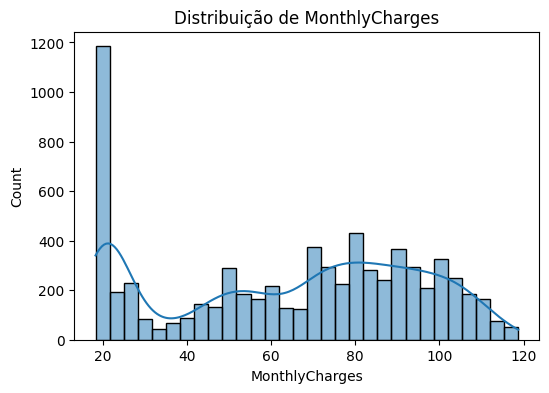

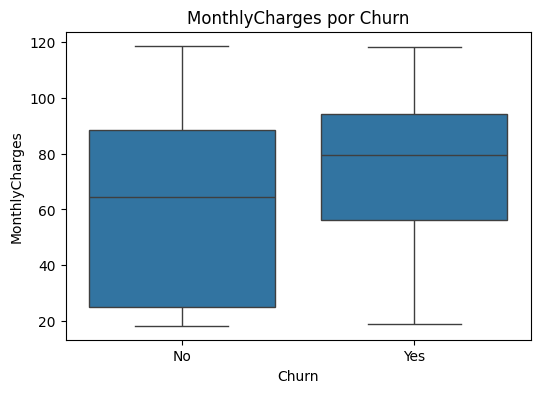

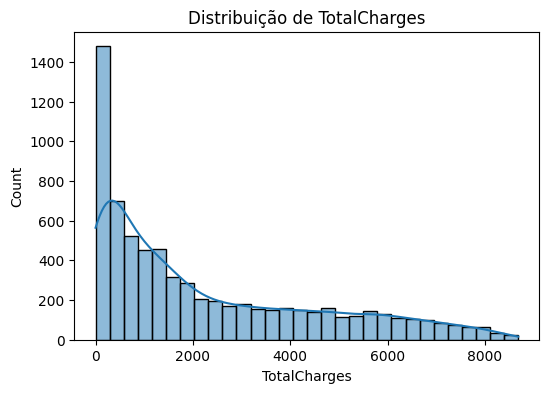

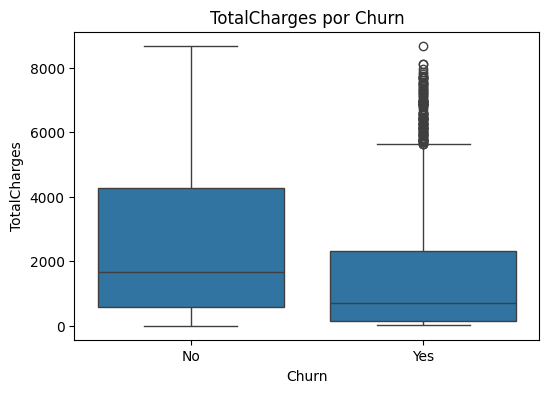

In [ ]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(data=df, x=col, bins=30, kde=True)
        plt.title(f"Distribuição de {col}")
        plt.show()

        plt.figure(figsize=(6,4))
        sns.boxplot(data=df, x="Churn", y=col)
        plt.title(f"{col} por Churn")
        plt.show()

In [ ]:
df.groupby("Churn")[["tenure", "MonthlyCharges", "TotalCharges"]].mean()


,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,37.569965,61.265124,2549.911442
Yes,17.979133,74.441332,1531.796094


## ETL


In [6]:
df_model = df.copy()

print(df_model.shape)
df_model.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
dups = df_model["customerID"].duplicated().sum()
print("Duplicados de customerID:", dups)

Duplicados de customerID: 0


In [8]:
df_model = df_model.drop(columns=["customerID"])
df_model.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df_model.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [10]:
df_model["Churn"] = df_model["Churn"].map({"No": 0, "Yes": 1})


print(df_model["Churn"].value_counts())
print(df_model["Churn"].value_counts(normalize=True))

Churn
0    5174
1    1869
Name: count, dtype: int64
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [11]:
X = df_model.drop("Churn", axis=1)
y = df_model["Churn"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (7043, 19)
y shape: (7043,)


In [12]:

cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
print("Colunas categóricas:", cat_cols)


cat_features = [X.columns.get_loc(col) for col in cat_cols]
print("Índices cat_features:", cat_features)

Colunas categóricas: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Índices cat_features: [0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


## PREPARANDO MODELO



In [13]:
# Partindo do df_model já tratado (sem customerID e com Churn em 0/1)

X = df_model.drop("Churn", axis=1)
y = df_model["Churn"]

print("Formato de X:", X.shape)
print("Formato de y:", y.shape)

# Colunas categóricas e índices para o CatBoost
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
cat_features = [X.columns.get_loc(col) for col in cat_cols]

print("Colunas categóricas:", cat_cols)
print("Índices cat_features:", cat_features)


Formato de X: (7043, 19)
Formato de y: (7043,)
Colunas categóricas: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Índices cat_features: [0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Formato X_train:", X_train.shape)
print("Formato X_test:", X_test.shape)

print("\nProporção de churn no treino:")
print(y_train.value_counts(normalize=True))

print("\nProporção de churn no teste:")
print(y_test.value_counts(normalize=True))

print("\nNulos em X_train:", X_train.isna().sum().sum())
print("Nulos em X_test:", X_test.isna().sum().sum())


Formato X_train: (5634, 19)
Formato X_test: (1409, 19)

Proporção de churn no treino:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Proporção de churn no teste:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64

Nulos em X_train: 0
Nulos em X_test: 0


In [15]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [16]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = CatBoostClassifier(
    depth=6,
    learning_rate=0.1,
    iterations=500,          # baseline (podemos tunar depois)
    loss_function="Logloss",
    eval_metric="AUC",
    random_state=42,
    verbose=100
)

model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    use_best_model=True
)


0:	test: 0.7944651	best: 0.7944651 (0)	total: 88.8ms	remaining: 44.3s
100:	test: 0.8462141	best: 0.8464969 (67)	total: 4.43s	remaining: 17.5s
200:	test: 0.8432225	best: 0.8464969 (67)	total: 9.33s	remaining: 13.9s
300:	test: 0.8403782	best: 0.8464969 (67)	total: 15.2s	remaining: 10.1s
400:	test: 0.8380932	best: 0.8464969 (67)	total: 20.6s	remaining: 5.09s
499:	test: 0.8366026	best: 0.8464969 (67)	total: 25.5s	remaining: 0us

bestTest = 0.8464969387
bestIteration = 67

Shrink model to first 68 iterations.


Top 15 features mais importantes:
Contract            19.491428
InternetService     16.857206
tenure              15.941633
TotalCharges         7.979587
MonthlyCharges       6.274271
PaymentMethod        6.058529
OnlineSecurity       5.534784
PaperlessBilling     3.560413
OnlineBackup         3.516113
MultipleLines        3.320201
TechSupport          3.217718
StreamingMovies      2.074110
PhoneService         1.179962
StreamingTV          1.104263
gender               1.050123
dtype: float64


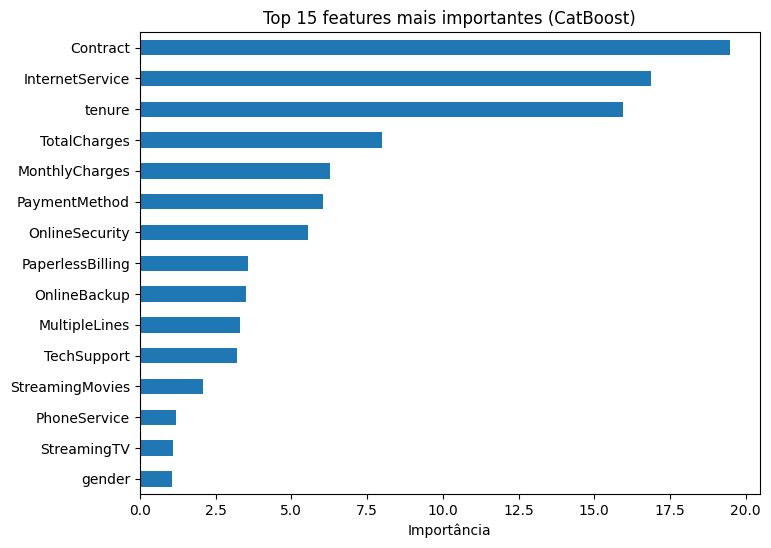

In [17]:


feature_importances = pd.Series(
    model.get_feature_importance(),
    index=X_train.columns
).sort_values(ascending=False)

print("Top 15 features mais importantes:")
print(feature_importances.head(15))

plt.figure(figsize=(8, 6))
feature_importances.head(15).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 15 features mais importantes (CatBoost)")
plt.xlabel("Importância")
plt.show()


In [18]:
# Probabilidades da classe 1 (churn)
y_proba = model.predict_proba(X_test)[:, 1]

# Previsão usando threshold padrão 0.5
y_pred = (y_proba >= 0.5).astype(int)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm,
    index=["Real: 0 (No churn)", "Real: 1 (Churn)"],
    columns=["Predito: 0", "Predito: 1"]
)

print("Matriz de confusão (threshold 0.5):")
print(cm_df)
print("\nRelatório de classificação (threshold 0.5):")
print(classification_report(y_test, y_pred, digits=3))

print("AUC:", roc_auc_score(y_test, y_proba))

Matriz de confusão (threshold 0.5):
                    Predito: 0  Predito: 1
Real: 0 (No churn)         930         105
Real: 1 (Churn)            169         205

Relatório de classificação (threshold 0.5):
              precision    recall  f1-score   support

           0      0.846     0.899     0.872      1035
           1      0.661     0.548     0.599       374

    accuracy                          0.806      1409
   macro avg      0.754     0.723     0.736      1409
weighted avg      0.797     0.806     0.799      1409

AUC: 0.8464969386964272


In [19]:
def metrics_for_threshold(threshold, y_true, y_scores):
    y_pred_th = (y_scores >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_th).ravel()

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    return {
        "threshold": threshold,
        "tn": tn,
        "fp": fp,
        "fn": fn,
        "tp": tp,
        "precision_1": precision,
        "recall_1": recall
    }

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

results = [metrics_for_threshold(t, y_test, y_proba) for t in thresholds]
df_thresh = pd.DataFrame(results)
df_thresh

,threshold,tn,fp,fn,tp,precision_1,recall_1
0,0.3,787,248,86,288,0.537313,0.770053
1,0.4,863,172,128,246,0.588517,0.657754
2,0.5,930,105,169,205,0.661290,0.548128
3,0.6,977,58,236,138,0.704082,0.368984
4,0.7,1017,18,293,81,0.818182,0.216578


In [20]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)


f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)

best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]
best_precision = precisions[best_idx]
best_recall = recalls[best_idx]

print("Melhor threshold (por F1):", best_threshold)
print("Precision classe 1:", best_precision)
print("Recall classe 1:", best_recall)


Melhor threshold (por F1): 0.3122726496439537
Precision classe 1: 0.5477099236641222
Recall classe 1: 0.767379679144385


In [21]:
thr = 0.3127


y_pred_custom = (y_proba >= thr).astype(int)

from sklearn.metrics import confusion_matrix, classification_report

print("Threshold usado:", thr)
print("\nMatriz de confusão (threshold customizado):")
print(confusion_matrix(y_test, y_pred_custom))

print("\nRelatório de classificação (threshold customizado):")
print(classification_report(y_test, y_pred_custom, digits=3))


Threshold usado: 0.3127

Matriz de confusão (threshold customizado):
[[799 236]
 [ 88 286]]

Relatório de classificação (threshold customizado):
              precision    recall  f1-score   support

           0      0.901     0.772     0.831      1035
           1      0.548     0.765     0.638       374

    accuracy                          0.770      1409
   macro avg      0.724     0.768     0.735      1409
weighted avg      0.807     0.770     0.780      1409



## FINE TUNNING


In [ ]:
thr = best_threshold

y_pred_custom = (y_proba >= thr).astype(int)

print("Threshold usado:", thr)

print("\nMatriz de confusão (threshold customizado):")
print(confusion_matrix(y_test, y_pred_custom))

print("\nRelatório de classificação (threshold customizado):")
print(classification_report(y_test, y_pred_custom, digits=3))

Threshold usado: 0.3122726496439537

Matriz de confusão (threshold customizado):
[[798 237]
 [ 87 287]]

Relatório de classificação (threshold customizado):
              precision    recall  f1-score   support

           0      0.902     0.771     0.831      1035
           1      0.548     0.767     0.639       374

    accuracy                          0.770      1409
   macro avg      0.725     0.769     0.735      1409
weighted avg      0.808     0.770     0.780      1409



In [ ]:

scale_pos = 5174 / 1869  # ~2.77

model_weighted = CatBoostClassifier(
    depth=6,
    learning_rate=0.1,
    iterations=500,
    loss_function="Logloss",
    eval_metric="AUC",
    random_state=42,
    verbose=100,
    scale_pos_weight=scale_pos
)

model_weighted.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    use_best_model=True
)

y_proba_w = model_weighted.predict_proba(X_test)[:, 1]
y_pred_w_05 = (y_proba_w >= 0.5).astype(int)

print("AUC (weighted):", roc_auc_score(y_test, y_proba_w))
print("\nMatriz de confusão (weighted, thr 0.5):")
print(confusion_matrix(y_test, y_pred_w_05))
print("\nClassification report:")
print(classification_report(y_test, y_pred_w_05, digits=3))


0:	test: 0.8189827	best: 0.8189827 (0)	total: 50.6ms	remaining: 25.2s
100:	test: 0.8443062	best: 0.8457452 (64)	total: 6.69s	remaining: 26.4s
200:	test: 0.8437792	best: 0.8460384 (144)	total: 10.2s	remaining: 15.1s
300:	test: 0.8391731	best: 0.8460384 (144)	total: 12.6s	remaining: 8.31s
400:	test: 0.8363443	best: 0.8460384 (144)	total: 15s	remaining: 3.7s
499:	test: 0.8356196	best: 0.8460384 (144)	total: 19s	remaining: 0us

bestTest = 0.846038389
bestIteration = 144

Shrink model to first 145 iterations.
AUC (weighted): 0.8460383890051408

Matriz de confusão (weighted, thr 0.5):
[[771 264]
 [ 77 297]]

Classification report:
              precision    recall  f1-score   support

           0      0.909     0.745     0.819      1035
           1      0.529     0.794     0.635       374

    accuracy                          0.758      1409
   macro avg      0.719     0.770     0.727      1409
weighted avg      0.808     0.758     0.770      1409



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

base_cb = CatBoostClassifier(
    loss_function="Logloss",
    eval_metric="AUC",
    random_state=42,
    verbose=False
)

param_dist = {
    "depth": [4, 6, 8],
    "learning_rate": [0.02, 0.05, 0.1],
    "l2_leaf_reg": [3, 5, 7, 9],
    "iterations": [300, 500, 800],
    "scale_pos_weight": [1.0, 1.5, 2.0, 2.8, 3.5]
}

rs = RandomizedSearchCV(
    estimator=base_cb,
    param_distributions=param_dist,
    n_iter=20,
    scoring="roc_auc",
    cv=3,
    n_jobs=-1,
    verbose=2,
    refit=True
)

rs.fit(X_train, y_train, cat_features=cat_features)

print("Melhores parâmetros:", rs.best_params_)
print("Melhor AUC em CV:", rs.best_score_)

best_model = rs.best_estimator_

# Avaliar no teste
y_proba_best = best_model.predict_proba(X_test)[:, 1]
print("AUC no teste (best_model):", roc_auc_score(y_test, y_proba_best))



Fitting 3 folds for each of 20 candidates, totalling 60 fits
Melhores parâmetros: {'scale_pos_weight': 1.5, 'learning_rate': 0.05, 'l2_leaf_reg': 3, 'iterations': 500, 'depth': 4}
Melhor AUC em CV: 0.8512356187332308
AUC no teste (best_model): 0.8454390451832907


In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

aucs = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

    m = CatBoostClassifier(
        depth=6,
        learning_rate=0.1,
        iterations=best_model.get_params().get("iterations", 500) if 'best_model' in globals() else 500,
        loss_function="Logloss",
        eval_metric="AUC",
        random_state=42,
        verbose=False,
        scale_pos_weight=best_model.get_params().get("scale_pos_weight", 1.0) if 'best_model' in globals() else 1.0
    )

    m.fit(X_tr, y_tr, cat_features=cat_features)
    proba_val = m.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, proba_val)
    aucs.append(auc)
    print(f"Fold {fold} - AUC: {auc:.4f}")

print("\nAUC média (5-fold):", np.mean(aucs), "+/-", np.std(aucs))


Fold 1 - AUC: 0.8498
Fold 2 - AUC: 0.8227
Fold 3 - AUC: 0.8477
Fold 4 - AUC: 0.8259
Fold 5 - AUC: 0.8343

AUC média (5-fold): 0.8360837703044105 +/- 0.01102394636063468


In [ ]:
#MELHORES PARAMETROS

{
  'scale_pos_weight': 1.5,
  'learning_rate': 0.05,
  'l2_leaf_reg': 3,
  'iterations': 500,
  'depth': 4
}


{'scale_pos_weight': 1.5,
 'learning_rate': 0.05,
 'l2_leaf_reg': 3,
 'iterations': 500,
 'depth': 4}

In [ ]:
y_proba_best = best_model.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_best)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)

best_idx = f1_scores.argmax()
best_threshold_best = thresholds[best_idx]

print("Melhor threshold (por F1):", best_threshold_best)
print("Precision:", precisions[best_idx])
print("Recall:", recalls[best_idx])

Melhor threshold (por F1): 0.43327043235562746
Precision: 0.5769230769230769
Recall: 0.7219251336898396


In [ ]:
thr = best_threshold_best  # fixa o threshold escolhido

y_pred_best_custom = (y_proba_best >= thr).astype(int)

print(confusion_matrix(y_test, y_pred_best_custom))
print(classification_report(y_test, y_pred_best_custom, digits=3))


[[837 198]
 [104 270]]
              precision    recall  f1-score   support

           0      0.889     0.809     0.847      1035
           1      0.577     0.722     0.641       374

    accuracy                          0.786      1409
   macro avg      0.733     0.765     0.744      1409
weighted avg      0.807     0.786     0.793      1409



## PIPELINE


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve
)
from catboost import CatBoostClassifier


In [23]:
def preparar_dados(df):
    """Recebe o df original e devolve X, y, cat_features."""

    df_model = df.copy()

    # Remover ID
    if "customerID" in df_model.columns:
        df_model = df_model.drop(columns=["customerID"])

    # Garantir target binário 0/1
    if df_model["Churn"].dtype == "object":
        df_model["Churn"] = df_model["Churn"].map({"No": 0, "Yes": 1})

    # Separar X e y
    X = df_model.drop("Churn", axis=1)
    y = df_model["Churn"]

    # Detectar colunas categóricas para o CatBoost
    cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
    cat_features = [X.columns.get_loc(col) for col in cat_cols]

    return X, y, cat_features


In [25]:
# Depois de preparar os dados
X, y, cat_features = preparar_dados(df)

feature_cols = X.columns.tolist()  # salva as colunas usadas no treino

model, X_train, X_test, y_train, y_test, y_proba_best, auc_best = treinar_melhor_modelo(
    X, y, cat_features
)


NameError: name 'treinar_melhor_modelo' is not defined

In [ ]:
def treinar_melhor_modelo(X, y, cat_features, test_size=0.2, random_state=42):
    """Treina o melhor modelo (com hiperparâmetros já definidos) e retorna tudo pronto."""

    # Split estratificado
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=y
    )

    # Melhor modelo já com hiperparâmetros definidos
    model = CatBoostClassifier(
        depth=4,
        learning_rate=0.05,
        l2_leaf_reg=3,
        iterations=500,
        scale_pos_weight=1.5,
        loss_function="Logloss",
        eval_metric="AUC",
        random_state=random_state,
        verbose=100
    )

    model.fit(
        X_train, y_train,
        cat_features=cat_features,
        eval_set=(X_test, y_test),
        use_best_model=True
    )

    # Probabilidade de classe 1 (churn)
    y_proba = model.predict_proba(X_test)[:, 1]

    # AUC no teste
    auc = roc_auc_score(y_test, y_proba)

    return model, X_train, X_test, y_train, y_test, y_proba, auc


In [ ]:
model, X_train, X_test, y_train, y_test, y_proba_best, auc_best = treinar_melhor_modelo(
    X, y, cat_features
)
print("AUC no teste:", auc_best)


In [ ]:
def escolher_threshold_f1(y_true, y_scores):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)

    best_idx = f1_scores.argmax()
    best_threshold = thresholds[best_idx]

    return best_threshold, precisions[best_idx], recalls[best_idx], f1_scores[best_idx]


In [ ]:
best_threshold_best, prec_best, rec_best, f1_best = escolher_threshold_f1(y_test, y_proba_best)

print("Melhor threshold (por F1):", best_threshold_best)
print("Precision (classe 1):", prec_best)
print("Recall (classe 1):", rec_best)
print("F1 (classe 1):", f1_best)

# Aplicar o threshold escolhido
y_pred_best = (y_proba_best >= best_threshold_best).astype(int)

print("\nMatriz de confusão (threshold otimizado):")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification report (threshold otimizado):")
print(classification_report(y_test, y_pred_best, digits=3))


In [ ]:
def prever_churn(model, df_novos, threshold, feature_cols):
    """
    df_novos: dataframe com dados de clientes (pode ter colunas extras como customerID/Churn).
    feature_cols: lista de colunas usadas no treino (X.columns).
    """
    df_new = df_novos.copy()

    # Remover coluna alvo se vier junto
    if "Churn" in df_new.columns:
        df_new = df_new.drop(columns=["Churn"])

    # Remover colunas que o modelo NÃO usa (ex.: customerID)
    cols_extras = [c for c in df_new.columns if c not in feature_cols]
    if cols_extras:
        df_new = df_new.drop(columns=cols_extras)

    # Garantir que a ordem das colunas é a MESMA do treino
    df_new = df_new[feature_cols]

    # Predição
    scores = model.predict_proba(df_new)[:, 1]
    preds = (scores >= threshold).astype(int)

    saida = df_new.copy()
    saida["score_churn"] = scores
    saida["churn_predito"] = preds

    return saida



In [ ]:
# exemplo só pra testar
df_clientes_novos = df_model.sample(10).drop(columns=["Churn"])

resultado = prever_churn(
    model,
    df_clientes_novos,
    best_threshold_best,   # seu threshold ótimo por F1
    feature_cols
)

resultado.head()


In [ ]:
X, y, cat_features = preparar_dados(df)

model, X_train, X_test, y_train, y_test, y_proba_best, auc_best = treinar_melhor_modelo(
    X, y, cat_features
)
print("AUC no teste:", auc_best)

best_threshold_best, prec_best, rec_best, f1_best = escolher_threshold_f1(y_test, y_proba_best)
print("Melhor threshold:", best_threshold_best)
print("Precision (classe 1):", prec_best)
print("Recall (classe 1):", rec_best)
print("F1 (classe 1):", f1_best)


## preparando para o back end


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score,
    precision_recall_curve
)
from catboost import CatBoostClassifier
import joblib


# =========================
# 2. Preparar dados
# =========================
def preparar_dados(df: pd.DataFrame):
    df_model = df.copy()

    # Remove ID se existir
    if "customerID" in df_model.columns:
        df_model = df_model.drop(columns=["customerID"])

    # Garantir target binário 0/1
    if df_model["Churn"].dtype == "object":
        df_model["Churn"] = df_model["Churn"].map({"No": 0, "Yes": 1})

    X = df_model.drop("Churn", axis=1)
    y = df_model["Churn"]

    # Detectar colunas categóricas para o CatBoost
    cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
    cat_features = [X.columns.get_loc(c) for c in cat_cols]

    return X, y, cat_features

X, y, cat_features = preparar_dados(df)
feature_cols = X.columns.tolist()

# =========================
# 3. Train/Test split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# =========================
# 4. Treinar o "melhor modelo" (parâmetros fixos)
# =========================
best_model = CatBoostClassifier(
    depth=4,
    learning_rate=0.05,
    l2_leaf_reg=3,
    iterations=500,
    scale_pos_weight=1.5,
    loss_function="Logloss",
    eval_metric="AUC",
    random_state=42,
    verbose=100
)

best_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    use_best_model=True
)

y_proba_best = best_model.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, y_proba_best)
print("AUC no teste:", auc_test)

# =========================
# 5. Calcular threshold ótimo por F1
# =========================
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_best)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)

best_idx = f1_scores.argmax()
best_threshold_best = float(thresholds[best_idx])

print("Melhor threshold (por F1):", best_threshold_best)
print("Precision (classe 1):", float(precisions[best_idx]))
print("Recall (classe 1):", float(recalls[best_idx]))
print("F1 (classe 1):", float(f1_scores[best_idx]))

# =========================
# 6. Salvar artefatos para o backend
# =========================
artefatos = {
    "model": best_model,
    "feature_cols": feature_cols,
    "threshold": best_threshold_best,
}

joblib.dump(artefatos, "churn_catboost_artifacts.pkl")
print("Artefatos salvos em churn_catboost_artifacts.pkl")


0:	test: 0.7893190	best: 0.7893190 (0)	total: 56.4ms	remaining: 28.1s
100:	test: 0.8457581	best: 0.8458718 (99)	total: 4.27s	remaining: 16.9s
200:	test: 0.8472125	best: 0.8473559 (168)	total: 9.22s	remaining: 13.7s
300:	test: 0.8471867	best: 0.8477215 (226)	total: 12.5s	remaining: 8.24s
400:	test: 0.8471557	best: 0.8477215 (226)	total: 15.3s	remaining: 3.78s
499:	test: 0.8454390	best: 0.8477215 (226)	total: 18.4s	remaining: 0us

bestTest = 0.8477214601
bestIteration = 226

Shrink model to first 227 iterations.
AUC no teste: 0.847721460125552
Melhor threshold (por F1): 0.450137944074359
Precision (classe 1): 0.5765957446808511
Recall (classe 1): 0.7245989304812834
F1 (classe 1): 0.6421800942931987
Artefatos salvos em churn_catboost_artifacts.pkl


In [27]:
%%writefile api_churn.py
import joblib
import pandas as pd
from fastapi import FastAPI
from pydantic import BaseModel
from typing import Optional

# =========================
# 1. Carregar artefatos do modelo
# =========================
artefatos = joblib.load("churn_catboost_artifacts.pkl")
model = artefatos["model"]
feature_cols = artefatos["feature_cols"]
threshold = artefatos["threshold"]

app = FastAPI(title="API de Churn - Telco + CatBoost")


# =========================
# 2. Schema (1 cliente por requisição)
# =========================
class Cliente(BaseModel):
    customerID: Optional[str] = None
    gender: str
    SeniorCitizen: int
    Partner: str
    Dependents: str
    tenure: int
    PhoneService: str
    MultipleLines: str
    InternetService: str
    OnlineSecurity: str
    OnlineBackup: str
    DeviceProtection: str
    TechSupport: str
    StreamingTV: str
    StreamingMovies: str
    Contract: str
    PaperlessBilling: str
    PaymentMethod: str
    MonthlyCharges: float
    TotalCharges: float


# =========================
# 3. Montar DataFrame igual ao usado no treino
# =========================
def montar_dataframe_unico(cliente: Cliente) -> pd.DataFrame:
    data = [cliente.dict()]
    df = pd.DataFrame(data)

    # Remove colunas que o modelo não usa (ex.: customerID)
    cols_extras = [c for c in df.columns if c not in feature_cols]
    if cols_extras:
        df = df.drop(columns=cols_extras)

    # Garante que todas as colunas existem
    for col in feature_cols:
        if col not in df.columns:
            df[col] = None

    # Reordenar colunas na mesma ordem do treino
    df = df[feature_cols]

    return df


# =========================
# 4. Endpoint de previsão (1 cliente, saída simples)
# =========================
@app.post("/predict")
def predict_churn(cliente: Cliente):
    df_novo = montar_dataframe_unico(cliente)

    # Probabilidade de churn (classe 1)
    score = float(model.predict_proba(df_novo)[:, 1][0])

    # Classificação usando o threshold salvo
    vai_cancelar = score >= float(threshold)

    previsao_texto = "Vai cancelar" if vai_cancelar else "Não vai cancelar"

    return {
        "previsao": previsao_texto,
        "probabilidade": score
    }


Writing api_churn.py


In [28]:
from api_churn import Cliente, predict_churn


In [29]:
payload_teste = Cliente(
    customerID="7590-VHVEG",
    gender="Female",
    SeniorCitizen=0,
    Partner="Yes",
    Dependents="No",
    tenure=1,
    PhoneService="No",
    MultipleLines="No phone service",
    InternetService="DSL",
    OnlineSecurity="No",
    OnlineBackup="Yes",
    DeviceProtection="No",
    TechSupport="No",
    StreamingTV="No",
    StreamingMovies="No",
    Contract="Month-to-month",
    PaperlessBilling="Yes",
    PaymentMethod="Electronic check",
    MonthlyCharges=29.85,
    TotalCharges=29.85
)


In [30]:
resposta = predict_churn(payload_teste)
resposta

{'previsao': 'Vai cancelar', 'probabilidade': 0.7708738375246865}